# Taller detección automática de pitch

## Tarea:
Implementar las funciones
1. "freq_from_autocorr" del modulo pitch
1. "track" del modulo pitch
1. "smooth_pitch" del modulo pitch




In [131]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from IPython.display import Audio, Image
import matplotlib.pyplot as plt
import pitch
import midi
import wav
import signal_processing
import visualizations

from pylab import rcParams
rcParams['figure.figsize'] = 16, 5


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


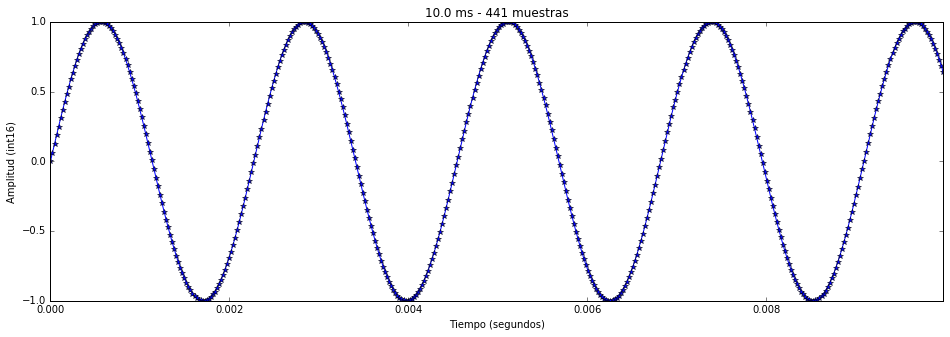

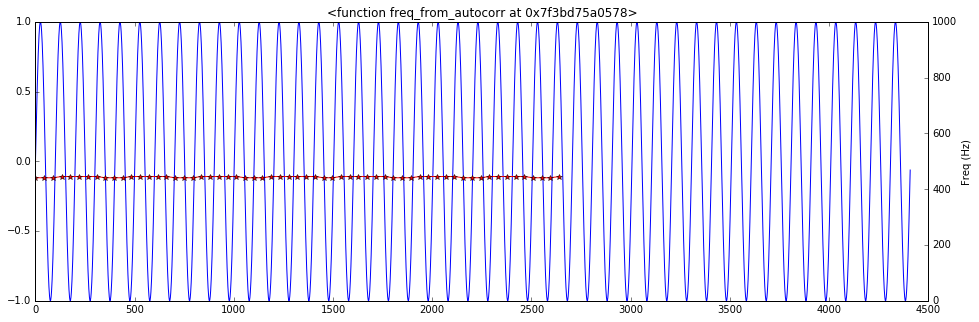

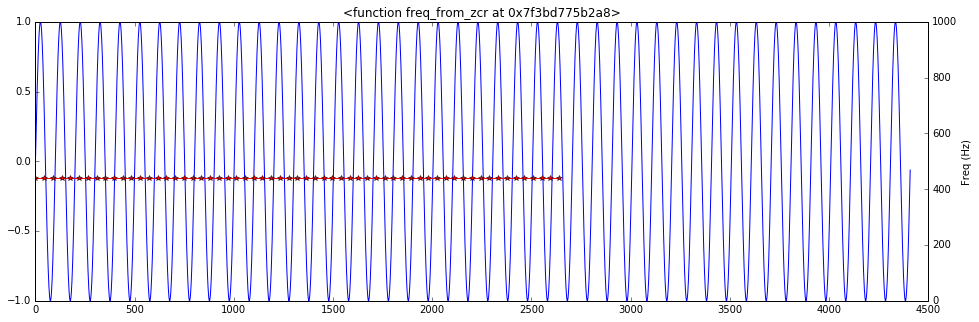

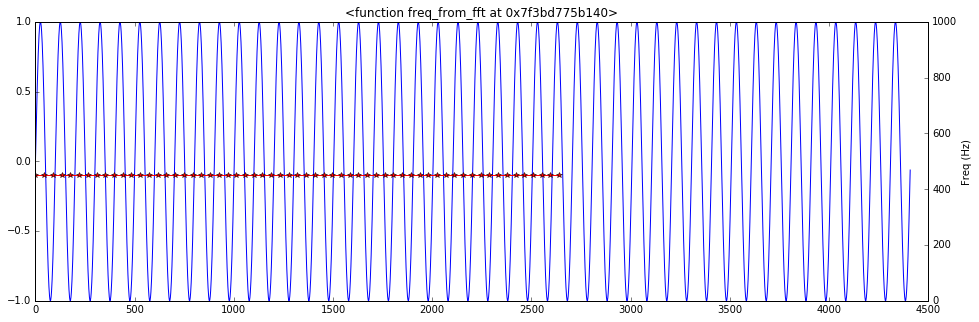

In [133]:
sample_rate = 44100
freq = 440

sinu_signal = signal_processing.sin(sampleRate = sample_rate, duration = 0.1, freq = freq)

visualizations.wave(0, 0.01, sample_rate, sinu_signal)
pitch_step = 0.001 

for method in [pitch.freq_from_autocorr, pitch.freq_from_zcr, pitch.freq_from_fft]:
    pitch_times, pitch_points = pitch.track(signal=sinu_signal, step=pitch_step, sample_rate=sample_rate, method=method)
    visualizations.pitch_track(sinu_signal, pitch_times, pitch_points, 0, 1000)
    plt.title(method)


Audio(data=sinu_signal, rate=sample_rate)

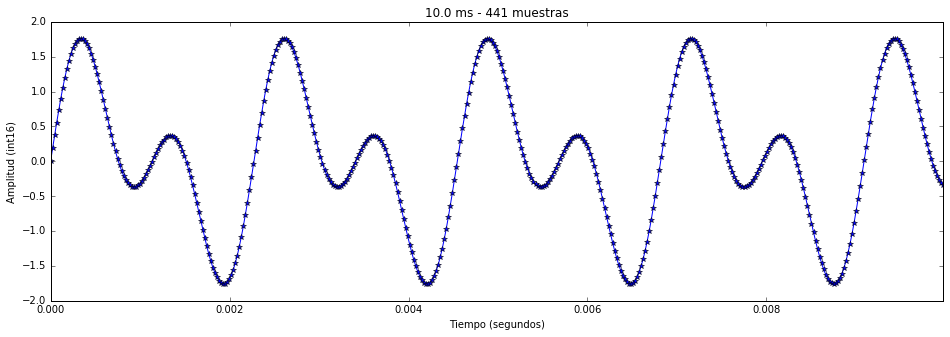

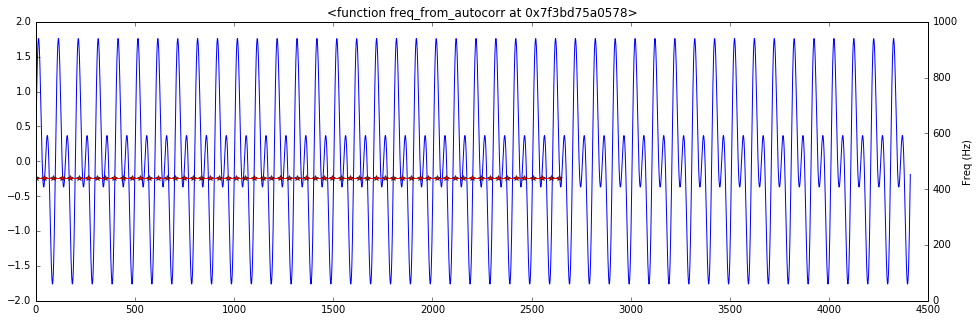

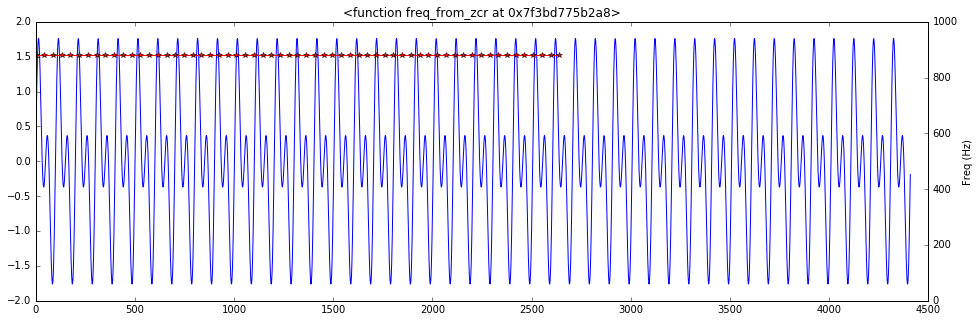

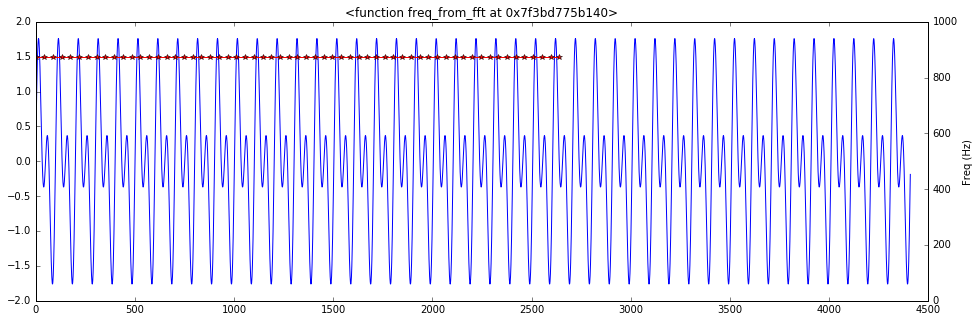

In [143]:
sample_rate = 44100
freq = 440

sinu_signal1 = signal_processing.sin(sampleRate = sample_rate, duration = 0.1, freq = freq)
sinu_signal2 = signal_processing.sin(sampleRate = sample_rate, duration = 0.1, freq = freq*2)

sinu_signal = sinu_signal1 + sinu_signal2
visualizations.wave(0, 0.01, sample_rate, sinu_signal)
pitch_step = 0.001 

for method in [pitch.freq_from_autocorr, pitch.freq_from_zcr, pitch.freq_from_fft]:
    pitch_times, pitch_points = pitch.track(signal=sinu_signal, step=pitch_step, sample_rate=sample_rate, method=method)
    visualizations.pitch_track(sinu_signal, pitch_times, pitch_points, 0, 1000)
    plt.title(method)


Audio(data=sinu_signal, rate=sample_rate)

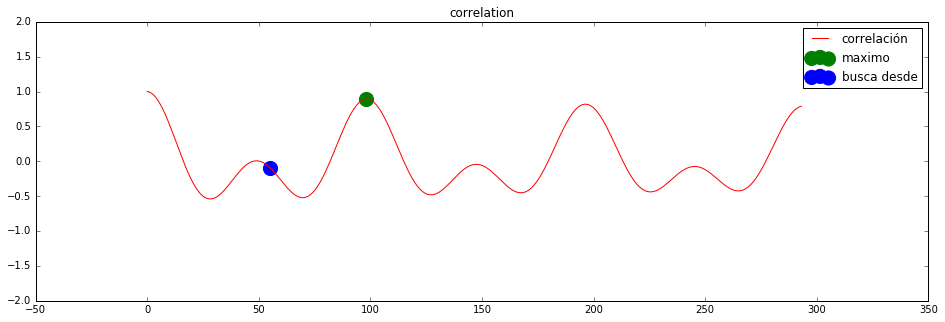

In [145]:

pitch_floor = 75 #Hz
pitch_ceil = 800 #Hz
pitch_step = 0.1 #Segs
pitch.freq_from_autocorr(sinu_signal[:int(sample_rate*1/pitch_floor)], sample_rate, max_freq=pitch_ceil, show_plot=True)

Audio(data=sinu_signal, rate=sample_rate)


(1, 2, 44100, 305152, 'NONE', 'not compressed')


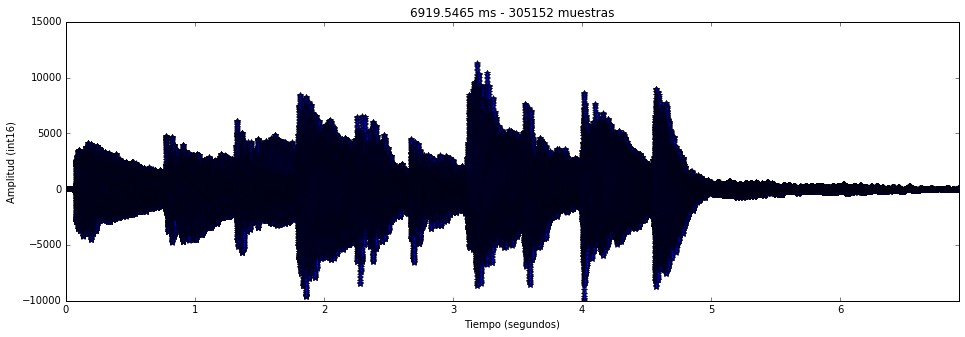

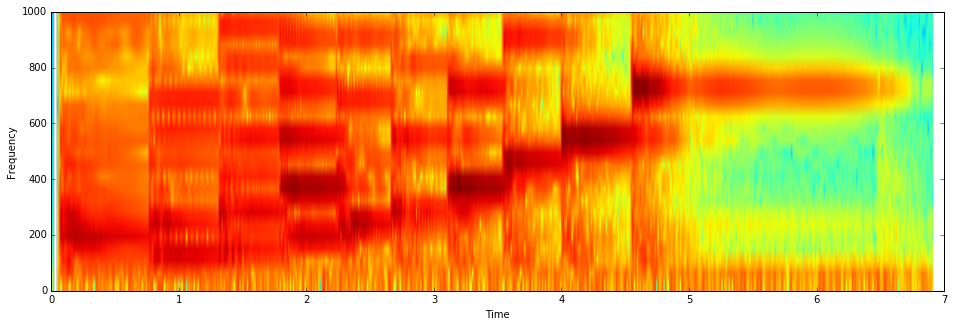

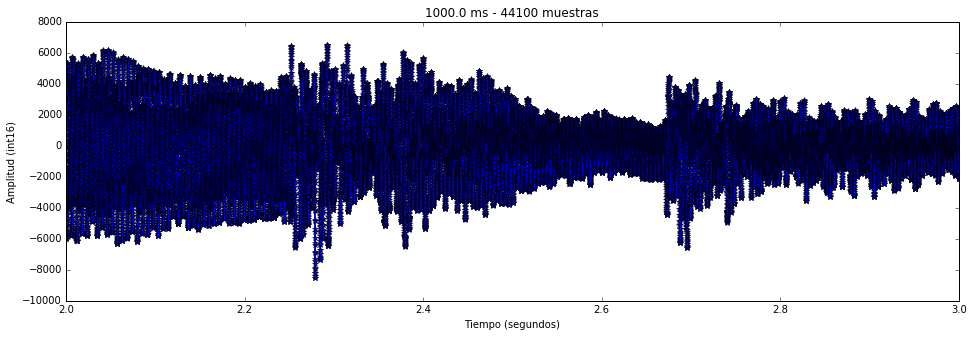

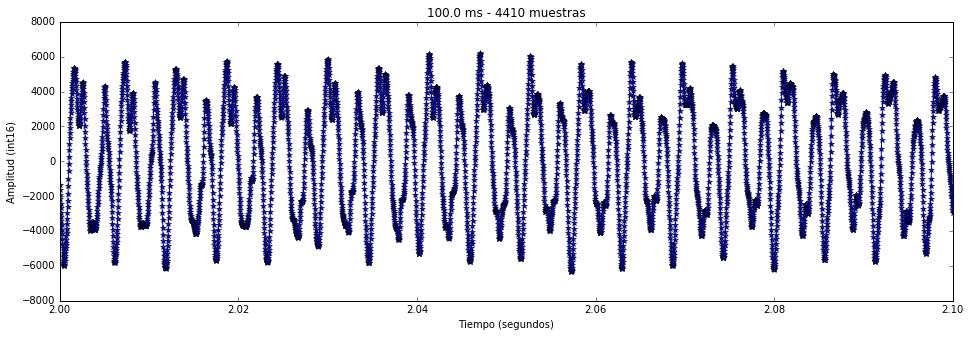

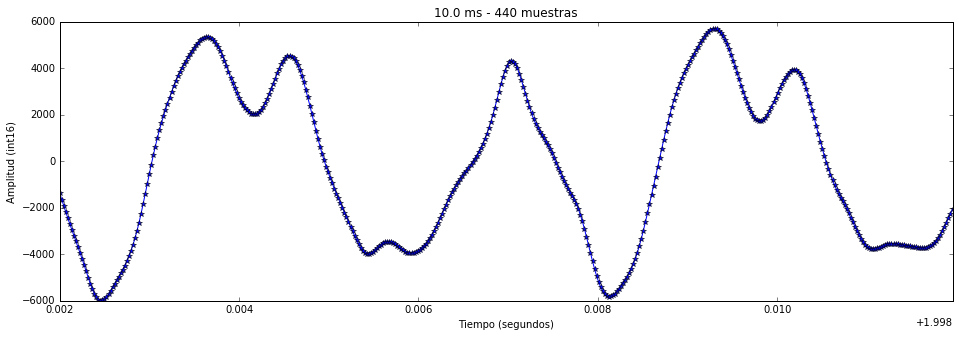

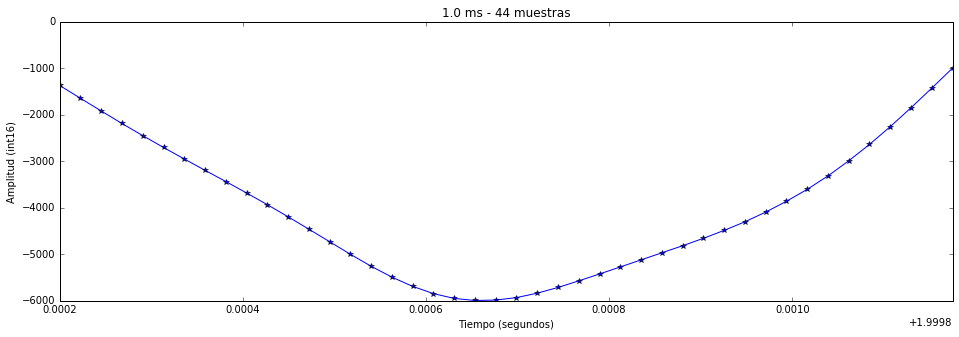

In [146]:
filename = "piano.wav"
signal, frames, sample_rate, total_time = wav.load_from_wav(filename)
visualizations.wave(0, total_time, sample_rate, signal, spectro=True)
visualizations.wave(2, 3, sample_rate, signal)
visualizations.wave(2, 2.1, sample_rate, signal)
visualizations.wave(2, 2.01, sample_rate, signal)
visualizations.wave(2, 2.001, sample_rate, signal)

Audio(data=signal, rate=sample_rate)

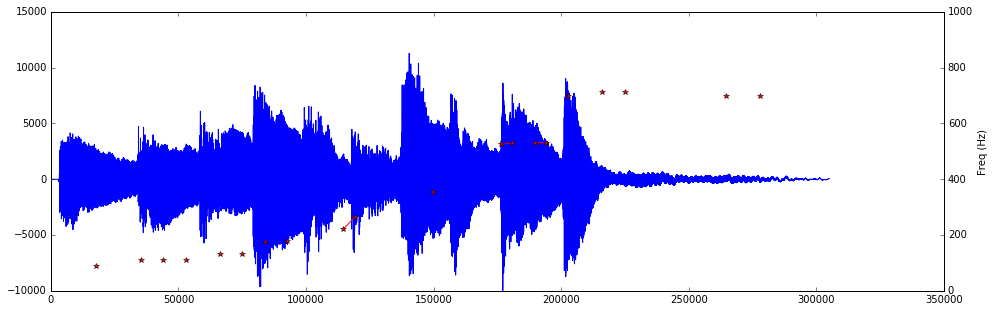

In [147]:
pitch_floor = 40 #Hz  (Frecuencia minima a detectar)
pitch_ceil = 1000 #Hz  (Frecuencia maxima a detectar)
pitch_step = 0.1 #Segs (Cada cuanto calcular el pitch)

pitch_times, pitch_points = pitch.track(signal=signal, method=pitch.freq_from_autocorr, step=pitch_step, min_pitch=pitch_floor, max_pitch=pitch_ceil, sample_rate=sample_rate, silence_threshold=2)
visualizations.pitch_track(signal, pitch_times, pitch_points, ymin=0, ymax=1000)

Audio(data=signal, rate=sample_rate)


In [148]:
midi_filename = midi.from_pitch_track(pitch_times, pitch_points, sample_rate, "tmp.midi")
midi.playMidi(midi_filename)


<music21.stream.Score 0x7f3bd6246850>

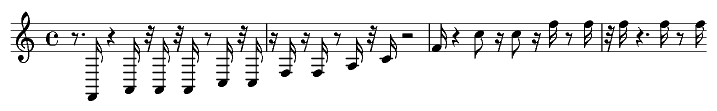

In [149]:
score = score_filename = midi.show_score(midi_filename)
Image(filename=score)